Ce code a pour but d'identifier les rapports $\frac{E}{(1-\nu^2)}$ pour chaque plaque, à partir des analyses modales. Nous testerons pour chacune avec un encastrement et un appuis simple.

Pour vérifier la "validité" entre AS et encastrement, on dispose des modules d'Young de constructeurs pour certaines plaques qui donnent un ordre de grandeur. En effet, si le rapport $\frac{E}{(1-\nu^2)}$ implique $\nu >> 0.5$ pour avoir $E$ de l'ordre de grandeur des constructeurs, c'est surement qu'il y a un problème dans le modèle théorique.

Dans un second temps, le code exporte un dictionnaire pour chaque plaque, contenant les paramètres utiles au modèle : $\rho$, $\frac{E}{(1-\nu^2)}$, $L_x, L_y, h$, 

In [1]:
E_construc = {
    "matériaux" : ["Polypropylène", "MDF", "Duralumin-Alu"],
    "rho (kg/m3)" : [900, 780, 2670],
    "E (GPa)" : [1.1, 2.7, 70],
    "url" : ["https://fr.wikipedia.org/wiki/Polypropyl%C3%A8ne", "https://www.bigmat.fr/wp-content/uploads/2018/03/ftcaracteristiques_kronodium_mdf_2010v1.pdf", "https://www.metallservice.ch/msm/msm-home/services/infos-t%C3%A9l%C3%A9chargement/infos-produits-fiches-techniques/plaques-d'aluminium/fiche-technique-pour-plaques-en-aluminium-en-aw-5754-nq.pdf ; https://lugand-aciers.fr/la5083-cp-alliage-daluminium/"]
}

import pandas as pd
print("Propriétés physiques des matériaux par les constructeurs")
pd.DataFrame(E_construc)

Propriétés physiques des matériaux par les constructeurs


,matériaux,rho (kg/m3),E (GPa),url
0,Polypropylène,900,1.1,https://fr.wikipedia.org/wiki/Polypropyl%C3%A8ne
1,MDF,780,2.7,https://www.bigmat.fr/wp-content/uploads/2018/...
2,Duralumin-Alu,2670,70.0,https://www.metallservice.ch/msm/msm-home/serv...


In [2]:
import pickle

with open('modal_plexi.pkl', 'rb') as f:
    modal_analysis_plexi = pickle.load(f)

with open('modal_m2.pkl', 'rb') as f:
    modal_analysis_m2 = pickle.load(f)

with open('modal_m1.pkl', 'rb') as f:
    modal_analysis_m1 = pickle.load(f)

with open('modal_metal.pkl', 'rb') as f:
    modal_analysis_metal = pickle.load(f)

In [3]:
import sys
sys.path.append("../")
from vico_modphy.guitare_config import *

NmB_idx[:,0]

array([1., 1.])

In [4]:
NmB_idx[:,0]

array([1., 1.])

In [5]:
import numpy as np

def Enu_AS (mode_idx, Lx, Ly, h, rho, modal_analysis) :
    n, m = NmB_idx[:,mode_idx]
    fnm = modal_analysis["freq"][mode_idx]
    Anm = ((n**2*Ly**2 + m**2*Lx**2)/(Lx**2*Ly**2))**2
    I = h**2*np.pi**4/12/rho
    Enu = (2*np.pi*fnm)**2/I/Anm
    return Enu

In [6]:
#Metal (qui est enfait un alliage aluminium-duralumin)
Lx=395e-3
Ly=255e-3
h=6.01e-3
rho=1588e-3/Lx/Ly/h
print(f"Masse volumique : {rho:.1f} (kg/m3)")

E = E_construc["E (GPa)"][2]*1e9
print(f"E constructeur : {E*1e-9} (GPa)")

Enu_AS_0 = Enu_AS(0, Lx, Ly, h, rho ,  modal_analysis=modal_analysis_metal)
Enu_AS_1 = Enu_AS(1, Lx, Ly, h, rho ,  modal_analysis=modal_analysis_metal)
Enu_AS_2 = Enu_AS(2, Lx, Ly, h, rho ,  modal_analysis=modal_analysis_metal)

print("================================================\nPour un appuis simple :\n")

print("E/(1-nu^2) calculé sur f11, f21, f12 :", Enu_AS_0, Enu_AS_1, Enu_AS_2)
print("E/(1-nu^2) moyenné sur les 2 premiers :", np.mean([Enu_AS_0, Enu_AS_1]))
# print(E/Enu_AS_0)
nu_cons0 = np.sqrt(1-E/Enu_AS_0)
nu_cons1 = np.sqrt(1-E/Enu_AS_1)
print("nu sachant E constructeur :", nu_cons0, nu_cons1)

Masse volumique : 2623.2 (kg/m3)
E constructeur : 70.0 (GPa)
Pour un appuis simple :

E/(1-nu^2) calculé sur f11, f21, f12 : 22268531070.80035 24990271594.501747 10938757407.662296
E/(1-nu^2) moyenné sur les 2 premiers : 23629401332.651047
nu sachant E constructeur : nan nan


/var/folders/9z/kzhjdk9j47z0026s88r_0ssh0000gn/T/ipykernel_93129/853518350.py:20: RuntimeWarning: invalid value encountered in sqrt
  nu_cons0 = np.sqrt(1-E/Enu_AS_0)
/var/folders/9z/kzhjdk9j47z0026s88r_0ssh0000gn/T/ipykernel_93129/853518350.py:21: RuntimeWarning: invalid value encountered in sqrt
  nu_cons1 = np.sqrt(1-E/Enu_AS_1)


In [7]:
#Polypropylène
Lx=400e-3
Ly=260e-3
h=4.51e-3
rho=382e-3/Lx/Ly/h
print(f"Masse volumique : {rho:.1f} (kg/m3)")

E = E_construc["E (GPa)"][0]*1e9
print(f"E constructeur : {E*1e-9} (GPa)")

Enu_AS_0 = Enu_AS(0, Lx, Ly, h, rho ,  modal_analysis=modal_analysis_plexi)
Enu_AS_1 = Enu_AS(1, Lx, Ly, h, rho ,  modal_analysis=modal_analysis_plexi)
Enu_AS_2 = Enu_AS(2, Lx, Ly, h, rho ,  modal_analysis=modal_analysis_plexi)

print("================================================\nPour un appuis simple :\n")

print("E/(1-nu^2) calculé sur f11, f21, f12 :", Enu_AS_0, Enu_AS_1, Enu_AS_2)
print("E/(1-nu^2) moyenné sur les 2 premiers :", np.mean([Enu_AS_0, Enu_AS_1]))
nu_cons0 = np.sqrt(1-E/Enu_AS_0)
nu_cons1 = np.sqrt(1-E/Enu_AS_1)
print("nu sachant E constructeur :", nu_cons0, nu_cons1)

Masse volumique : 814.4 (kg/m3)
E constructeur : 1.1 (GPa)
Pour un appuis simple :

E/(1-nu^2) calculé sur f11, f21, f12 : 2285967714.144355 2484714707.31419 1115650607.2154143
E/(1-nu^2) moyenné sur les 2 premiers : 2385341210.7292724
nu sachant E constructeur : 0.7202800515414235 0.7465207559297051


In [8]:
#MDF2
Lx=400e-3
Ly=260e-3
h=6.04e-3
rho=507e-3/Lx/Ly/h
print(f"Masse volumique : {rho:.1f} (kg/m3)")

E = E_construc["E (GPa)"][1]*1e9
print(f"E constructeur : {E*1e-9} (GPa)")

Enu_AS_0 = Enu_AS(0, Lx, Ly, h, rho ,  modal_analysis=modal_analysis_m2)
Enu_AS_1 = Enu_AS(1, Lx, Ly, h, rho ,  modal_analysis=modal_analysis_m2)
Enu_AS_2 = Enu_AS(2, Lx, Ly, h, rho ,  modal_analysis=modal_analysis_m2)

print("================================================\nPour un appuis simple :\n")

print("E/(1-nu^2) calculé sur f11, f21, f12 :", Enu_AS_0, Enu_AS_1, Enu_AS_2)
print("E/(1-nu^2) moyenné sur les 2 premiers :", np.mean([Enu_AS_0, Enu_AS_1]))
nu_cons0 = np.sqrt(1-E/Enu_AS_0)
nu_cons1 = np.sqrt(1-E/Enu_AS_1)
print("nu sachant E constructeur :", nu_cons0, nu_cons1)

Masse volumique : 807.1 (kg/m3)
E constructeur : 2.7 (GPa)
Pour un appuis simple :

E/(1-nu^2) calculé sur f11, f21, f12 : 2787725397.3611646 1810502731.9665265 908343256.8168987
E/(1-nu^2) moyenné sur les 2 premiers : 2299114064.6638455
nu sachant E constructeur : 0.17739348925172904 nan


/var/folders/9z/kzhjdk9j47z0026s88r_0ssh0000gn/T/ipykernel_93129/248347123.py:20: RuntimeWarning: invalid value encountered in sqrt
  nu_cons1 = np.sqrt(1-E/Enu_AS_1)


In [9]:
#MDF1
Lx=400e-3
Ly=259e-3
h=2.95e-3
rho=236e-3/Lx/Ly/h
print(f"Masse volumique : {rho:.1f} (kg/m3)")

E = E_construc["E (GPa)"][1]*1e9
print(f"E constructeur : {E*1e-9} (GPa)")

Enu_AS_0 = Enu_AS(0, Lx, Ly, h, rho ,  modal_analysis=modal_analysis_m1)
Enu_AS_1 = Enu_AS(1, Lx, Ly, h, rho ,  modal_analysis=modal_analysis_m1)
Enu_AS_2 = Enu_AS(2, Lx, Ly, h, rho ,  modal_analysis=modal_analysis_m1)

print("================================================\nPour un appuis simple :\n")

print("E/(1-nu^2) calculé sur f11, f21, f12 :", Enu_AS_0, Enu_AS_1, Enu_AS_2)
print("E/(1-nu^2) moyenné sur les 2 premiers :", np.mean([Enu_AS_0, Enu_AS_1]))
nu_cons0 = np.sqrt(1-E/Enu_AS_0)
nu_cons1 = np.sqrt(1-E/Enu_AS_1)
print("nu sachant E constructeur :", nu_cons0, nu_cons1)

Masse volumique : 772.2 (kg/m3)
E constructeur : 2.7 (GPa)
Pour un appuis simple :

E/(1-nu^2) calculé sur f11, f21, f12 : 5422850651.826864 6015814426.430029 2545472114.025044
E/(1-nu^2) moyenné sur les 2 premiers : 5719332539.128447
nu sachant E constructeur : 0.7085950081629058 0.7424169744822622


# Etude de l'influence des dimensions de la plaque pour approcher les valeurs constructeurs

## Plaque M1

In [33]:
#Testons de faire varier Lx, Ly pour obtenir de meilleures valeures de nu
Lx=400e-3
Ly=259e-3
h=2.95e-3
rho=236e-3/Lx/Ly/h

E = E_construc["E (GPa)"][1]*1e9
print(rho,E*1e-9)

delta = 100e-3
deltah = 0
Lxs = np.linspace(Lx-delta, Lx)
Lys = np.linspace(Ly-delta, Ly)
hs = np.linspace(h, h+deltah, 2)

nus = np.zeros((len(Lxs),len(Lys), len(hs)))
for i in range(len(Lxs)) :
    for j in range(len(Lys)) :
        for k in range(len(hs)) :
            Enu_AS_0 = Enu_AS(0, Lxs[i], Lys[j], hs[k], rho ,  modal_analysis=modal_analysis_m1)
            nu_cons0 = np.sqrt(1-E/Enu_AS_0)
            nus[i,j,k] = nu_cons0

772.2007722007722 2.7


/var/folders/9z/kzhjdk9j47z0026s88r_0ssh0000gn/T/ipykernel_93129/3481850861.py:21: RuntimeWarning: invalid value encountered in sqrt
  nu_cons0 = np.sqrt(1-E/Enu_AS_0)


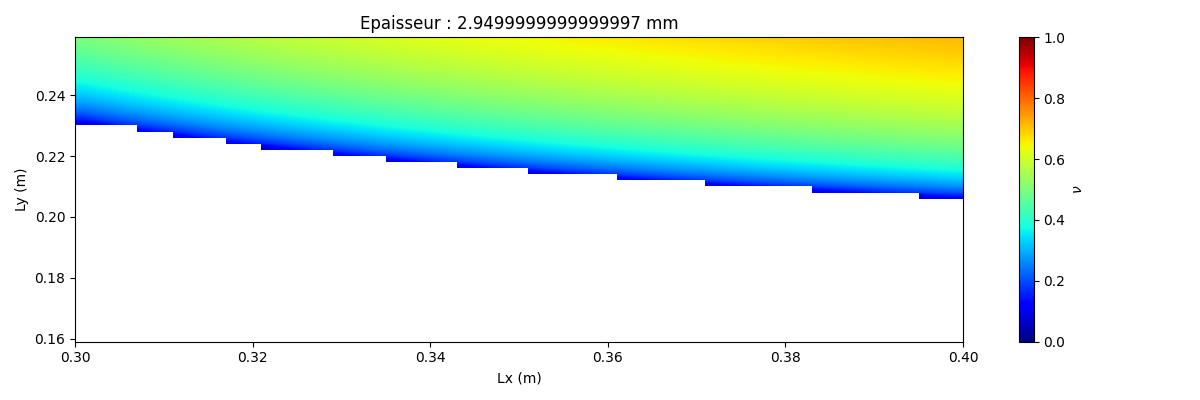

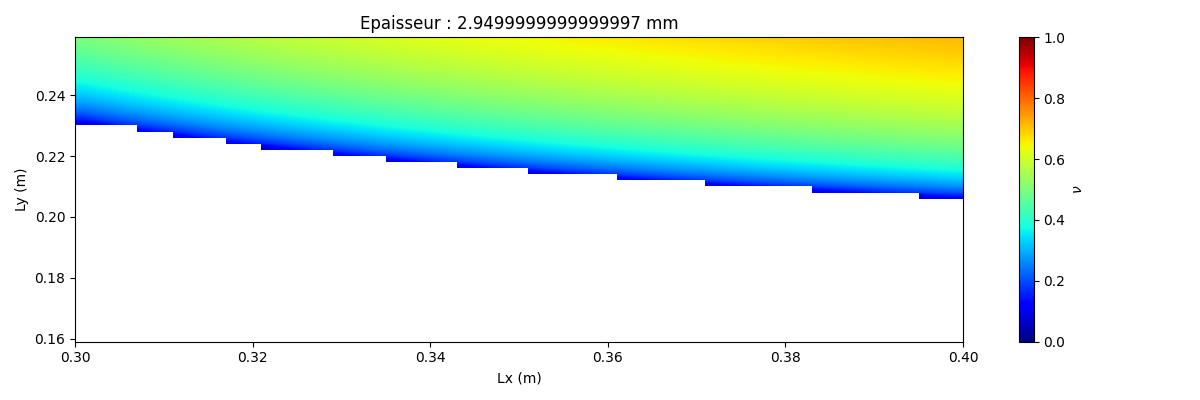

In [34]:
import matplotlib.pyplot as plt

%matplotlib widget
plt.rcParams["figure.figsize"] = (12,4)


for k in range(len(hs)) :
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    img = ax1.imshow(nus[:,:,k].T,
        extent=[Lxs[0], Lxs[-1] , Lys[0], Lys[-1]] ,
        cmap="jet" ,
        interpolation = "bilinear",
        aspect="auto" ,
        origin="lower")

    cbar = fig.colorbar(img,ax=ax1)
    img.set_clim(0, 1)
    cbar.set_label(r"$\nu$")
    ax1.set_ylabel("Ly (m)")
    ax1.set_xlabel(r"Lx (m)")
    ax1.set_title(fr"Epaisseur : {hs[k]*1e3} mm")

    fig.tight_layout()

    plt.show()

**Rappel :** ces courbes sont pour le medium 1

On voit alors que pour matcher avec des valeurs de $\nu$ habituelles (de l'ordre de 0.3,0.5) tout en restant sur une hypothèse d'appuis simple, on peut ajuster les dimensions de notre plaque.

In [45]:
eps = 3e-3
ps = np.argwhere(np.abs(nus-0.4) < eps)
# print(ps)
p = ps[2]
q = ps[0]
Lxs[p[0]], Lys[p[1]], hs[p[-1]], nus[p[0],p[1],p[-1]]

(0.3081632653061225, 0.2426734693877551, 0.00295, 0.3977064767371278)

Par exemple, pour cette plaque m1, on ajuste de quelques centimètre les largeurs et longueurs et cela permet d'obtenir une valeur de $\nu$ à 0.4. Cela permet de corriger en quelque sorte le modèle réel pour qu'il s'ajuste mieux à une description analytique par appuis simple.

Désormais, on peut alors regarder avec ces modifications de dimensionnement si les rapports de fréquences sont plus adaptés par rapport à la réponse de table mesurée.

In [40]:
Lx, Ly, h = Lxs[p[0]], Lys[p[1]], hs[p[-1]]
nu = nus[p[0],p[1],p[-1]]

[1.0, 2.148296940621798, 2.851703059378202, 4.0, 5.937874825008538]

In [41]:
## Calcul des modes
def omega_pq (p,q) :    #Calcul analytique des pulsations propres d'une plaque en appuis simple
    return np.sqrt(E*h**2/(12*rho*(1-nu**2))) * ((p*np.pi/Lx)**2+(q*np.pi/Ly)**2)

wnB = np.zeros(9)
NmB_idx = np.zeros((2,9))   #Cette liste permet de remonter du mode contracté "i" au mode réel (n_i,m_i) en appelant NmB_idx[:,i]
j = 0
for n in range(1,3+1) :
    for m in range(1,3+1) :
        wnB[j] = omega_pq(n,m)
        NmB_idx[0,j] = n
        NmB_idx[1,j] = m
        j += 1

### Tri par ordre de fréquences croissantes
tri_idx = np.argsort(wnB)

wnB = wnB[tri_idx]    #On range les pulsations par ordre croissant
fnB = wnB/(2*np.pi)

In [44]:
print(fnB)
pd.DataFrame(modal_analysis_m1).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
table,Medium_1,Medium_1,Medium_1,Medium_1,Medium_1,Medium_1,Medium_1,Medium_1,Medium_1,Medium_1,Medium_1,Medium_1,Medium_1
freq,75,149,160,184,268,286,319,345,427,460,515,602,654
xi,-0.00026,-0.000179,-0.000337,-0.000808,-0.000549,-0.000603,-0.000752,-0.000908,-0.000219,-0.000758,-0.001235,-0.001077,-0.000958
ratios,1.0,1.986667,2.133333,2.453333,3.573333,3.813333,4.253333,4.6,5.693333,6.133333,6.866667,8.026667,8.72
xi_mod,-0.088747,-0.030742,-0.05392,-0.112417,-0.052442,-0.053975,-0.060349,-0.067376,-0.01313,-0.042184,-0.06139,-0.045799,-0.0375


En corrigeant sur la première fréquence, on retrouve évidemment la première fréquence puis il y a étonnement une bonne concordance sur le 2e (avec le 3e mesuré : qui est peut être dû à autre chose).

Mettons ce processus dans une fonction pour observer l'influence de cette correction sur les autres plaques.

In [85]:
def corr_dim_AS(modal_analysis, Lx_init, Ly_init, h_init, rho, E, delta_l, delta_h=0, Nh=1, mode_idx=0, plot=False, nu_cible = 0.4, eps=3e-3) :
    """
    Prends une plaque d'entrée avec son analyse modale, retourne une plaque pour laquelle on corrige les dimensions pour approcher un appuis simple,
    avec des valeurs de E et nu qui sont celles d'un constructeur.

    ## Inputs (not optional)
    - `modal_analysis` : dictionnaire contenant une clef ["freq"] avec les fréquences propres en Hz
    - `Lx_init` : longueur réelle mesurée de la plaque (en m)
    - `Lx_init` : largeur réelle mesurée de la plaque (en m)
    - `h_init` : épaisseur réelle mesurée de la plaque (en m)
    - `rho` : masse volumique du matériau (kg/m3)
    - `E` : module d'Young du matériau (Pa)
    - `delta_l` : corrections maximales à appliquer sur les longueurs et largeurs (en m)

    ### Optional
    - `delta_h` : correction maximale à appliquer sur l'épaisseur (en m) (0 par défaut : pas de correction d'épaisseur)
    - `Nh` : nombre de test de correction d'epaisseur (1 par défaut)
    - `mode_idx` : choix du mode pour accorder la plaque (premier mode de l'analyse modal par défaut)
    - `plot` : si True, montre une cartographie des valeurs de nu en fonction des dimensions
    - `nu_cible` : valeur de nu à viser pour établir la correction (0.4 par défaut)
    - `eps` : tolérance pour comparer l'égalité entre 2 valeurs (3e-3 par défaut)

    ## Outputs (dans l'ordre)
    - `Lx_corr` : nouvelle longueur de plaque après correction
    - `Ly_corr` : nouvelle largeur de plaque après correction
    - `h_corr` : nouvelle épaisseur de plaque après correction
    - `nu_corr` : nu réel le plus proche de la cible demandé
    """

    Lys = np.linspace(Ly_init-delta_l, Ly_init+delta_l)
    # Lys = np.insert(Lys, 0,Ly_init)
    Lxs = np.linspace(Lx_init-delta_l, Lx_init+delta_l)
    # Lxs = np.insert(Lxs, 0,Lx_init)
    hs = np.linspace(h_init-delta_h, h_init+delta_h, Nh)
    # hs = np.insert(hs, 0,h_init)
    nus = np.zeros((len(Lxs),len(Lys), len(hs)))
    for i in range(len(Lxs)) :
        for j in range(len(Lys)) :
            for k in range(len(hs)) :
                Enu_AS_0 = Enu_AS(mode_idx, Lxs[i], Lys[j], hs[k], rho ,  modal_analysis=modal_analysis)
                nu_cons0 = np.sqrt(1-E/Enu_AS_0)
                nus[i,j,k] = nu_cons0
    if plot :
        for k in range(len(hs)) :
            fig = plt.figure()
            ax1 = fig.add_subplot(111)
            img = ax1.imshow(nus[:,:,k].T,
                extent=[Lxs[0], Lxs[-1] , Lys[0], Lys[-1]] ,
                cmap="jet" ,
                interpolation = "bilinear",
                aspect="auto" ,
                origin="lower")

            cbar = fig.colorbar(img,ax=ax1)
            img.set_clim(0, 1)
            cbar.set_label(r"$\nu$")
            ax1.set_ylabel("Ly (m)")
            ax1.set_xlabel(r"Lx (m)")
            ax1.set_title(fr"Epaisseur : {hs[k]*1e3:.2f} mm")

            fig.tight_layout()

            plt.show()
    #Détermination des correctoions nécessaires pour approcher une valeure classique de nu
    ps = np.argwhere(np.abs(nus-nu_cible) < eps)

    dico_init = {
        "Lx_init" : [Lx_init],
        "Ly_init" : [Ly_init],
        "h_init" : [h_init],
    }
    print(pd.DataFrame(dico_init))
    dico_corr = {
        "Lx_corr" : Lxs[ps[:,0]],
        "Ly_corr" : Lxs[ps[:,1]],
        "h_corr" : hs[ps[:,2]],
    }
    print(pd.DataFrame(dico_corr))
    
    idx_choice = int(input("Choisir l'indice de la correction à appliqué :"))

    Lx_corr, Ly_corr, h_corr = Lxs[ps[idx_choice,0]], Lys[ps[idx_choice,1]], hs[ps[idx_choice,2]]
    nu_corr = nus[ps[idx_choice,0],ps[idx_choice,1],ps[idx_choice,2]]

    return Lx_corr, Ly_corr, h_corr, nu_corr

In [86]:
def compute_AS_frequencies(Lx, Ly, h, nu, E, rho) :
    """
    Calcul les modes d'une plaque simplement supportée pour une configuration donnée.

    ## Outputs
    - fnB : arrayLike, vecteur des fréquence propres (aplati)
    - NmB_idx : arrayLike, matrice permettant de remonté au réel indice n,m du mode aplatit i en appelant NmB_idx[:,i]
    """
    ## Calcul des modes
    def omega_pq (p,q) :    #Calcul analytique des pulsations propres d'une plaque en appuis simple
        return np.sqrt(E*h**2/(12*rho*(1-nu**2))) * ((p*np.pi/Lx)**2+(q*np.pi/Ly)**2)

    wnB = np.zeros(9)
    NmB_idx = np.zeros((2,9))   #Cette liste permet de remonter du mode contracté "i" au mode réel (n_i,m_i) en appelant NmB_idx[:,i]
    j = 0
    for n in range(1,3+1) :
        for m in range(1,3+1) :
            wnB[j] = omega_pq(n,m)
            NmB_idx[0,j] = n
            NmB_idx[1,j] = m
            j += 1

    ### Tri par ordre de fréquences croissantes
    tri_idx = np.argsort(wnB)

    wnB = wnB[tri_idx]    #On range les pulsations par ordre croissant
    fnB = wnB/(2*np.pi)
    return fnB, NmB_idx

## Plaque M2

In [105]:
pd.DataFrame(E_construc)

,matériaux,rho (kg/m3),E (GPa),url
0,Polypropylène,900,1.1,https://fr.wikipedia.org/wiki/Polypropyl%C3%A8ne
1,MDF,780,2.7,https://www.bigmat.fr/wp-content/uploads/2018/...
2,Duralumin-Alu,2670,70.0,https://www.metallservice.ch/msm/msm-home/serv...


In [106]:
Lx_corr, Ly_corr, h_corr, nu_corr = corr_dim_AS(modal_analysis_m2, 400e-3, 260e-3, 6.04e-3, 507e-3/400e-3/260e-3/6.04e-3, E_construc["E (GPa)"][1]*1e9, 10e-2, delta_h=4e-3, Nh=4, plot=False)

/var/folders/9z/kzhjdk9j47z0026s88r_0ssh0000gn/T/ipykernel_93129/2961342474.py:41: RuntimeWarning: invalid value encountered in sqrt
  nu_cons0 = np.sqrt(1-E/Enu_AS_0)


   Lx_init  Ly_init   h_init
0      0.4     0.26  0.00604
    Lx_corr   Ly_corr    h_corr
0  0.340816  0.385714  0.004707
1  0.353061  0.381633  0.004707
2  0.373469  0.475510  0.007373
3  0.385714  0.467347  0.007373
4  0.418367  0.451020  0.007373
5  0.455102  0.438776  0.007373
6  0.459184  0.361224  0.004707
7  0.487755  0.430612  0.007373
8  0.495918  0.500000  0.010040


In [107]:
compute_AS_frequencies(Lx_corr,Ly_corr, h_corr, nu_corr, E, 507e-3/400e-3/260e-3/6.04e-3)

(array([107.10948395, 167.64263593, 268.53122256, 367.90478382,
        428.4379358 , 529.32652243, 802.56361694, 863.09676892,
        963.98535555]),
 array([[1., 1., 1., 2., 2., 2., 3., 3., 3.],
        [1., 2., 3., 1., 2., 3., 1., 2., 3.]]))

In [91]:
pd.DataFrame(modal_analysis_m2).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
table,Medium_2,Medium_2,Medium_2,Medium_2,Medium_2,Medium_2,Medium_2,Medium_2,Medium_2,Medium_2,Medium_2,Medium_2,Medium_2,Medium_2,Medium_2,Medium_2
freq,107.109484,163.230958,190.083095,265.824204,413.324927,429.22436,460.312744,533.201989,604.013371,695.290919,759.978194,816.237921,872.904512,909.5429,1043.627614,1094.671593
xi,-0.000471,-0.001456,-0.000493,-0.000567,-0.002309,-0.00096,-0.000979,-0.000899,-0.0014,-0.000975,-0.001144,-0.002126,-0.002223,-0.001305,-0.0017,-0.00364
ratios,1.0,1.523964,1.774662,2.481799,3.858901,4.007342,4.297591,4.978102,5.639215,6.491404,7.09534,7.620594,8.149647,8.491712,9.743559,10.220118
xi_mod,-0.112532,-0.228424,-0.066335,-0.054624,-0.143033,-0.05725,-0.05447,-0.04318,-0.059321,-0.035913,-0.038542,-0.066675,-0.065191,-0.03673,-0.041708,-0.085118


Pour la plaque MDF2, la correction semble super efficace pour le modèle ! En effet, on approche les 2 premières fréquences propres beaucoup mieux, et à part quelques fréquences supplémentaires observées lors de l'analyse modale, on retrouve les fréquences dans chaque liste. Il semblerait que la correction à appliquer soit donc la suivante :

In [93]:
print(Lx_corr, Ly_corr, h_corr, nu_corr, E, rho)

0.4591836734693878 0.22122448979591836 0.004706666666666666 0.3977126067216919 2700000000.0 772.2007722007722


## Plaque aluminium

In [101]:
Lx_corr, Ly_corr, h_corr, nu_corr = corr_dim_AS(modal_analysis_metal, 395e-3, 255e-3, 6.01e-3, 1588e-3/395e-3/255e-3/6.01e-3, E_construc["E (GPa)"][2]*1e9, 10e-2, delta_h=4e-3, Nh=4, plot=False)

/var/folders/9z/kzhjdk9j47z0026s88r_0ssh0000gn/T/ipykernel_93129/2961342474.py:41: RuntimeWarning: invalid value encountered in sqrt
  nu_cons0 = np.sqrt(1-E/Enu_AS_0)


   Lx_init  Ly_init   h_init
0    0.395    0.255  0.00601
     Lx_corr   Ly_corr    h_corr
0   0.295000  0.352143  0.002010
1   0.307245  0.348061  0.002010
2   0.339898  0.339898  0.002010
3   0.392959  0.331735  0.002010
4   0.397041  0.490918  0.004677
5   0.409286  0.482755  0.004677
6   0.417449  0.478673  0.004677
7   0.433776  0.327653  0.002010
8   0.433776  0.470510  0.004677
9   0.454184  0.462347  0.004677
10  0.466429  0.458265  0.004677
11  0.495000  0.450102  0.004677


In [102]:
fnB, Nmb_idx = compute_AS_frequencies(Lx_corr,Ly_corr, h_corr, nu_corr, E_construc["E (GPa)"][2]*1e9, 1588e-3/395e-3/255e-3/6.01e-3)
print(fnB)
pd.DataFrame(modal_analysis_metal).T

[ 173.          349.91021261  515.08978739  644.76056697  692.
  986.85035436 1085.23943303 1262.14964564 1557.        ]


,0,1,2,3,4,5,6,7,8,9,10,11,12
table,Metal,Metal,Metal,Metal,Metal,Metal,Metal,Metal,Metal,Metal,Metal,Metal,Metal
freq,173,345,378,506,606,711,776,842,889,967,1049,1097,1184
xi,-0.000429,-0.000814,-0.000775,-0.000819,-0.000982,-0.0006,-0.001486,-0.001408,-0.001427,-0.001286,-0.00196,-0.001712,-0.001862
ratios,1.0,1.99422,2.184971,2.924855,3.50289,4.109827,4.485549,4.867052,5.138728,5.589595,6.063584,6.34104,6.843931
xi_mod,-0.063436,-0.060403,-0.052469,-0.041436,-0.041484,-0.021603,-0.049023,-0.042809,-0.041092,-0.034045,-0.047832,-0.039952,-0.040259


## Plaque polypropylène

In [103]:
Lx_corr, Ly_corr, h_corr, nu_corr = corr_dim_AS(modal_analysis_plexi, 400e-3, 260e-3, 4.51e-3, 382e-3/400e-3/260e-3/4.51e-3, E_construc["E (GPa)"][0]*1e9, 10e-2, delta_h=4e-3, Nh=4, plot=False)

/var/folders/9z/kzhjdk9j47z0026s88r_0ssh0000gn/T/ipykernel_93129/2961342474.py:41: RuntimeWarning: invalid value encountered in sqrt
  nu_cons0 = np.sqrt(1-E/Enu_AS_0)


   Lx_init  Ly_init   h_init
0      0.4     0.26  0.00451
     Lx_corr   Ly_corr    h_corr
0   0.300000  0.451020  0.005843
1   0.304082  0.446939  0.005843
2   0.308163  0.442857  0.005843
3   0.312245  0.438776  0.005843
4   0.328571  0.426531  0.005843
5   0.369388  0.316327  0.003177
6   0.369388  0.406122  0.005843
7   0.377551  0.500000  0.008510
8   0.381633  0.402041  0.005843
9   0.393878  0.397959  0.005843
10  0.393878  0.487755  0.008510
11  0.406122  0.479592  0.008510
12  0.410204  0.393878  0.005843
13  0.418367  0.312245  0.003177
14  0.430612  0.467347  0.008510
15  0.451020  0.385714  0.005843
16  0.451020  0.459184  0.008510
17  0.463265  0.455102  0.008510
18  0.479592  0.381633  0.005843
19  0.491837  0.308163  0.003177
20  0.491837  0.446939  0.008510
21  0.495918  0.308163  0.003177


In [104]:
fnB, Nmb_idx = compute_AS_frequencies(Lx_corr,Ly_corr, h_corr, nu_corr, E_construc["E (GPa)"][0]*1e9, 382e-3/400e-3/260e-3/4.51e-3)
print(fnB)
pd.DataFrame(modal_analysis_plexi).T

[ 72.09741278 103.44591513 155.69341904 257.04114877 288.38965112
 340.63715503 565.28070876 596.62921111 648.87671502]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
table,Plexi,Plexi,Plexi,Plexi,Plexi,Plexi,Plexi,Plexi,Plexi,Plexi,Plexi,Plexi,Plexi,Plexi,Plexi,Plexi,Plexi
freq,72.097413,142.142158,156.590101,236.72695,248.253002,294.943587,337.500398,402.021668,444.456305,480.0,496.899323,545.1771,561.253466,587.926653,652.493822,667.709243,691.521475
xi,-0.000201,-0.00021,-0.00045,-0.000356,-0.000392,-0.000153,-0.000507,-0.000319,-0.000362,-0.000275,-0.000584,-0.000823,-0.000755,-0.000377,-0.000542,-0.003401,-0.000542
ratios,1.0,1.971529,2.171924,3.283432,3.4433,4.090904,4.681172,5.57609,6.164664,6.657659,6.892055,7.561674,7.784655,8.154615,9.05017,9.261209,9.591488
xi_mod,-0.071505,-0.037908,-0.073574,-0.038456,-0.040453,-0.013247,-0.03843,-0.020312,-0.020856,-0.014682,-0.030071,-0.038635,-0.034432,-0.016427,-0.021269,-0.130382,-0.020069


# Encastrement

In [206]:
Nmx = 7
Nmy = 7

Gx_Nmx = np.arange(2,Nmx+2)-1/2
Gx_Nmx[0] = 1.506

Hx_Nmx = (np.arange(2,Nmx+2)-1/2)**2*(1-2/((np.arange(2,Nmx+2)-1/2)*np.pi))
Hx_Nmx[0] = 1.248

Jx_Nmx = Hx_Nmx

Gy_Nmy = np.arange(2,Nmy+2)-1/2
Gy_Nmy[0] = 1.506

Hy_Nmy = (np.arange(2,Nmy+2)-1/2)**2*(1-2/((np.arange(2,Nmy+2)-1/2)*np.pi))
Hy_Nmy[0] = 1.248

Jy_Nmy = Hy_Nmy

In [197]:
D = E*h**3/(12*(1-nu**2))
#Formule de l'article qui ne va pas pour l'appuis simple : 
w2_Nmx_Nmy = np.pi**4*D/(Lx**4*rho*h) * (Gx_Nmx[:,np.newaxis]**4 + Gy_Nmy[np.newaxis,:]**4*(Lx/Ly)**4 + 2*(Lx/Ly)**2 * (nu*Hx_Nmx[:,np.newaxis]*Hy_Nmy[np.newaxis,:] + (1-nu)*Jx_Nmx[:,np.newaxis]*Jy_Nmy[np.newaxis,:]))
# Formule corrigée pour retomber sur ces pattes lors d'un AS, mais jsp si ca convient pr un encastré
# w2_Nmx_Nmy = np.pi**4*D/(Lx**2*rho*h) * (Gx_Nmx[:,np.newaxis]**4 + Gy_Nmy[np.newaxis,:]**4*(Lx/Ly)**4 + 2*(Lx/Ly)**2 * (nu*Hx_Nmx[:,np.newaxis]*Hy_Nmy[np.newaxis,:] + (1-nu)*Jx_Nmx[:,np.newaxis]*Jy_Nmy[np.newaxis,:]))
w_Nmx_Nmy = np.sqrt(w2_Nmx_Nmy)
f_Nmx_Nmy = w_Nmx_Nmy/2/np.pi

In [198]:
print(h, nu, E, Lx, Ly, rho)

0.00395 0.30271658528000406 2700000000.0 0.3061224489795919 0.1610408163265306 772.2007722007722


In [199]:
f_NmB = f_Nmx_Nmy.reshape(-1)
p = np.argsort(f_NmB)
f_NmB = f_NmB[p]
f_NmB

array([ 342.79331078,  456.5707481 ,  657.69787607,  885.16640798,
        996.32793615, 1184.34128916, 1699.86771274, 1812.34249303,
       1996.72461865])

In [193]:
f_NmB/f_NmB[0]

array([1.        , 1.33191265, 1.91864268, 2.58221611, 2.9064976 ,
       3.454972  , 4.95887072, 5.28698325, 5.82486459])

In [207]:
def Enu_clamped (mode_idx, Lx, Ly, h, rho, modal_analysis) :
    n, m = NmB_idx[:,mode_idx]
    n,m = int(n), int(m)
    fnm = modal_analysis["freq"][mode_idx]
    Anm = (Gx_Nmx[n]**4 + Gy_Nmy[m]**4*(Lx/Ly)**4 + 2*(Lx/Ly)**2 * Jx_Nmx[n]*Jy_Nmy[m])
    I = h**2*np.pi**2/12/rho
    Enu = (2*np.pi*fnm)**2/Lx**4/I/Anm
    return Enu

In [208]:
#Metal (qui est enfait un alliage aluminium-duralumin)
Lx=395e-3
Ly=255e-3
h=6.01e-3
rho=1588e-3/Lx/Ly/h
print(f"Masse volumique : {rho:.1f} (kg/m3)")

E = E_construc["E (GPa)"][2]*1e9
print(f"E constructeur : {E*1e-9} (GPa)")

Enu_AS_0 = Enu_clamped(0, Lx, Ly, h, rho ,  modal_analysis=modal_analysis_metal)
Enu_AS_1 = Enu_clamped(1, Lx, Ly, h, rho ,  modal_analysis=modal_analysis_metal)
Enu_AS_2 = Enu_clamped(2, Lx, Ly, h, rho ,  modal_analysis=modal_analysis_metal)

print("================================================\nPour un appuis simple :\n")

print("E/(1-nu^2) calculé sur f11, f21, f12 :", Enu_AS_0, Enu_AS_1, Enu_AS_2)
print("E/(1-nu^2) moyenné sur les 2 premiers :", np.mean([Enu_AS_0, Enu_AS_1]))
# print(E/Enu_AS_0)
nu_cons0 = np.sqrt(1-E/Enu_AS_0)
nu_cons1 = np.sqrt(1-E/Enu_AS_1)
print("nu sachant E constructeur :", nu_cons0, nu_cons1)

Masse volumique : 2623.2 (kg/m3)
E constructeur : 70.0 (GPa)
Pour un appuis simple :

E/(1-nu^2) calculé sur f11, f21, f12 : 11642991020384.63 15122609606097.875 7337313314895.2705
E/(1-nu^2) moyenné sur les 2 premiers : 13382800313241.254
nu sachant E constructeur : 0.9969893676432778 0.9976829001612351


In [209]:
#Polypropylène
Lx=400e-3
Ly=260e-3
h=4.51e-3
rho=382e-3/Lx/Ly/h
print(f"Masse volumique : {rho:.1f} (kg/m3)")

E = E_construc["E (GPa)"][0]*1e9
print(f"E constructeur : {E*1e-9} (GPa)")

Enu_AS_0 = Enu_clamped(0, Lx, Ly, h, rho ,  modal_analysis=modal_analysis_plexi)
Enu_AS_1 = Enu_clamped(1, Lx, Ly, h, rho ,  modal_analysis=modal_analysis_plexi)
Enu_AS_2 = Enu_clamped(2, Lx, Ly, h, rho ,  modal_analysis=modal_analysis_plexi)

print("================================================\nPour un appuis simple :\n")

print("E/(1-nu^2) calculé sur f11, f21, f12 :", Enu_AS_0, Enu_AS_1, Enu_AS_2)
print("E/(1-nu^2) moyenné sur les 2 premiers :", np.mean([Enu_AS_0, Enu_AS_1]))
nu_cons0 = np.sqrt(1-E/Enu_AS_0)
nu_cons1 = np.sqrt(1-E/Enu_AS_1)
print("nu sachant E constructeur :", nu_cons0, nu_cons1)

Masse volumique : 814.4 (kg/m3)
E constructeur : 1.1 (GPa)
Pour un appuis simple :

E/(1-nu^2) calculé sur f11, f21, f12 : 6230807723368.518 8118267364311.232 3944354635948.0117
E/(1-nu^2) moyenné sur les 2 premiers : 7174537543839.875
nu sachant E constructeur : 0.9999117250441509 0.99993224925869


In [210]:
#MDF2
Lx=400e-3
Ly=260e-3
h=6.04e-3
rho=507e-3/Lx/Ly/h
print(f"Masse volumique : {rho:.1f} (kg/m3)")

E = E_construc["E (GPa)"][1]*1e9
print(f"E constructeur : {E*1e-9} (GPa)")

Enu_AS_0 = Enu_AS(0, Lx, Ly, h, rho ,  modal_analysis=modal_analysis_m2)
Enu_AS_1 = Enu_AS(1, Lx, Ly, h, rho ,  modal_analysis=modal_analysis_m2)
Enu_AS_2 = Enu_AS(2, Lx, Ly, h, rho ,  modal_analysis=modal_analysis_m2)

print("================================================\nPour un appuis simple :\n")

print("E/(1-nu^2) calculé sur f11, f21, f12 :", Enu_AS_0, Enu_AS_1, Enu_AS_2)
print("E/(1-nu^2) moyenné sur les 2 premiers :", np.mean([Enu_AS_0, Enu_AS_1]))
nu_cons0 = np.sqrt(1-E/Enu_AS_0)
nu_cons1 = np.sqrt(1-E/Enu_AS_1)
print("nu sachant E constructeur :", nu_cons0, nu_cons1)

Masse volumique : 807.1 (kg/m3)
E constructeur : 2.7 (GPa)
Pour un appuis simple :

E/(1-nu^2) calculé sur f11, f21, f12 : 7272543777.119565 2992272870.2732553 791316088.273878
E/(1-nu^2) moyenné sur les 2 premiers : 5132408323.69641
nu sachant E constructeur : 0.7929316697460834 0.31253139811816416


In [211]:
#MDF1
Lx=400e-3
Ly=259e-3
h=2.95e-3
rho=236e-3/Lx/Ly/h
print(f"Masse volumique : {rho:.1f} (kg/m3)")

E = E_construc["E (GPa)"][1]*1e9
print(f"E constructeur : {E*1e-9} (GPa)")

Enu_AS_0 = Enu_AS(0, Lx, Ly, h, rho ,  modal_analysis=modal_analysis_m1)
Enu_AS_1 = Enu_AS(1, Lx, Ly, h, rho ,  modal_analysis=modal_analysis_m1)
Enu_AS_2 = Enu_AS(2, Lx, Ly, h, rho ,  modal_analysis=modal_analysis_m1)

print("================================================\nPour un appuis simple :\n")

print("E/(1-nu^2) calculé sur f11, f21, f12 :", Enu_AS_0, Enu_AS_1, Enu_AS_2)
print("E/(1-nu^2) moyenné sur les 2 premiers :", np.mean([Enu_AS_0, Enu_AS_1]))
nu_cons0 = np.sqrt(1-E/Enu_AS_0)
nu_cons1 = np.sqrt(1-E/Enu_AS_1)
print("nu sachant E constructeur :", nu_cons0, nu_cons1)

Masse volumique : 772.2 (kg/m3)
E constructeur : 2.7 (GPa)
Pour un appuis simple :

E/(1-nu^2) calculé sur f11, f21, f12 : 28853421717.07133 11834953842.649645 3127354574.2134757
E/(1-nu^2) moyenné sur les 2 premiers : 20344187779.86049
nu sachant E constructeur : 0.9520628008946148 0.8785569008988662
